dF1/dx = 2
dF1/dy = 9*y**2
dF2/dx = -4*x
dF2/dy = 3
13 [-0.72057164  0.67948232]
5 [-0.36148936  0.4204497 ]


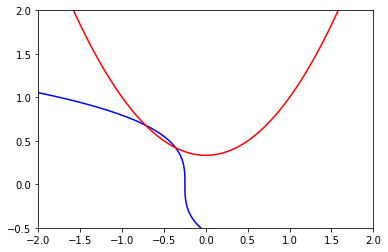

In [2]:
from sympy import *
import numpy as np
from matplotlib import pylab as plt
eps=1e-5
def func(x: float, y:float)->object:
    return 2*x + 3 * y ** 3 + 0.5, -2 * x ** 2 + 3 * y - 1

x = np.arange(-10, 10 + 0.01, 0.01)
y = np.arange(-10, 10 + 0.01, 0.01)
X, Y = np.meshgrid(x, y)
F1, F2 = func(X, Y) 
plt.contour(X, Y, F1, [0], colors="blue")
plt.contour(X, Y, F2, [0], colors="red")
plt.xlim([-2, 2])
plt.ylim([-0.5, 2])
def Jacobian(func: object, symbols: list)->object:
    ''' Вычисление якобиана для системы'''
    
    sumb = symbol_1, symbol_2 = Symbol(symbols[0]), Symbol(symbols[1])
    
    df_1_dx_1 = func(*sumb)[0].diff(symbol_1)
    df_1_dx_2 = func(*sumb)[0].diff(symbol_2)
    df_2_dx_1 = func(*sumb)[1].diff(symbol_1)
    df_2_dx_2 = func(*sumb)[1].diff(symbol_2)
    
    print("dF1/d%s = %s" % (symbol_1, df_1_dx_1))
    print("dF1/d%s = %s" % (symbol_2, df_1_dx_2))    
    print("dF2/d%s = %s" % (symbol_1, df_2_dx_1))       
    print("dF2/d%s = %s" % (symbol_2, df_2_dx_2))   
    
    return lambdify((symbol_1, symbol_2), df_1_dx_1), lambdify((symbol_1, symbol_2),df_1_dx_2), lambdify((symbol_1, symbol_2), df_2_dx_1), lambdify((symbol_1, symbol_2),df_2_dx_2)
jacobian = Jacobian(func, ['x', 'y'])
def Newton(func: object, 
           jacobian: list, 
           eps: float, x_zer: list):
    '''1'''
    def calc_jacob(x: float, y: float)->"np.array":
        return np.array([[jacobian[0](x, y), jacobian[1](x, y)], [jacobian[2](x, y), jacobian[3](x, y)]])
    
    def good_enough(x_cur: "np.array", x_prev: "np.array")->bool:
        return np.linalg.norm(x_cur - x_prev) <= eps
    
    x_prev = x_zer
    iteration = 0
    results = []
    flag = 1
    
    while flag:
        x_cur = x_prev - np.linalg.matrix_power(calc_jacob(*x_prev), -1) @ np.array(func(*x_prev))
        iteration += 1
        
        if good_enough(x_cur, x_prev):
            flag = 0
        x_prev = x_cur
        
    print(iteration, x_cur)
Newton(func, jacobian, eps, (-2,-2))
Newton(func, jacobian, eps, (-0.5, 0.5))
plt.show()